# **Deskriptive** Statistik

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib_inline
import matplotlib.pyplot as plt

sns.set_theme('paper')

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## **Univariate** Verteilungen
In der Statistik geben **Verteilungen** an, wie wahrscheinlich oder häufig eine bestimmte Merkmausausprägung oder eine Kombination von Merkmausausprägungen ist. Univariate Verteilung beschreiben dabei die Wahrscheinlichkeiten einer einzelnen statischen Variable.
<br/><br/>
**Kategoriale Variablen** (nominale und ordinale Variablen), werden typischerweise in *Häufigkeitstabellen* zusammengefasst. Wichtige Kennzahlen für metrische Variablen sind hingegen u.a. die *zentrale Lage*, *Streuung* und die *Symmetrie*.


### 3.1. **Häufigkeiten**

In [3]:
df = pd.read_csv('./data/Library_Usage.csv', low_memory=False)

In [3]:
df.head(3)

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,5,Staff,53,15,NaN,b2,Bayview,Mar,2023.0,z,Email,True,2003,False
1,5,Staff,480,378,NaN,e9,Excelsior,Jun,2023.0,z,Email,True,2003,False
2,5,Staff,70,33,45 to 54 years,n4,Noe Valley,Jan,2023.0,z,Email,True,2011,False


In [4]:
df.shape

(436290, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436290 entries, 0 to 436289
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              436290 non-null  int64  
 1   Patron Type Definition        436290 non-null  object 
 2   Total Checkouts               436290 non-null  int64  
 3   Total Renewals                436290 non-null  int64  
 4   Age Range                     435378 non-null  object 
 5   Home Library Code             436288 non-null  object 
 6   Home Library Definition       436260 non-null  object 
 7   Circulation Active Month      396777 non-null  object 
 8   Circulation Active Year       396777 non-null  float64
 9   Notice Preference Code        393301 non-null  object 
 10  Notice Preference Definition  393301 non-null  object 
 11  Provided Email Address        436290 non-null  bool   
 12  Year Patron Registered        436290 non-nul

#### **Häufigkeitstabelle** → `value_counts()` 
*Kategoriale Variablen* werden in Häufigkeitstabellen zusammengefasst. Dabei wird für jede Ausprägung die Anzahl der Beobachtungen gezählt.

In [6]:
# Absolute Häufigkeitstabelle
df['Age Range'].value_counts()

Age Range
25 to 34 years       92669
35 to 44 years       81719
10 to 19 years       66857
45 to 54 years       48319
0 to 9 years         32692
65 to 74 years       31714
20 to 24 years       25381
75 years and over    19297
55 to 59 years       19076
60 to 64 years       17654
Name: count, dtype: int64

In [7]:
# Relative Häufigkeitstabelle
df['Age Range'].value_counts(normalize=True)

Age Range
25 to 34 years       0.212847
35 to 44 years       0.187697
10 to 19 years       0.153561
45 to 54 years       0.110982
0 to 9 years         0.075089
65 to 74 years       0.072842
20 to 24 years       0.058296
75 years and over    0.044322
55 to 59 years       0.043815
60 to 64 years       0.040549
Name: proportion, dtype: float64

In [8]:
age_mode = df['Age Range'].mode()
age_mode

0    25 to 34 years
Name: Age Range, dtype: object

#### **Aufgabe** Häufigkeiten

1. Erstelle eine Häufigkeitsverteilung für die Variable 'Year Patron Registered'. Wieviel Prozent der Kunden wurden 2013 im System registriert? Wie viele in den kommenden Jahren? Was fällt Dir auf?

In [9]:
registered_patrons = df['Year Patron Registered'].value_counts(normalize=True)
registered_patrons[2013]

0.030553072497650643

In [10]:
registered_patrons[registered_patrons.index > 2013].sort_index()

Year Patron Registered
2014    0.036593
2015    0.046201
2016    0.049781
2017    0.067203
2018    0.065603
2019    0.101515
2020    0.073369
2021    0.074799
2022    0.119583
2023    0.060249
Name: proportion, dtype: float64

kontinuierliches Wachstum; bewsonders stark zwischen 2019-2022

2. Wieviel Prozent der Kunden sind zwischen 25 und 34 Jahren?

In [11]:
df['Age Range'].value_counts(normalize=True)[:1]

Age Range
25 to 34 years    0.212847
Name: proportion, dtype: float64

3. Ersetze die fehlenden Werte in der Spalte Age Range durch den Modus dieser Spalte. 

In [12]:
print(f"Missing values: {df['Age Range'].isna().sum()}")
print(f"Missing values in %: {round(df['Age Range'].isna().sum() / len(df['Age Range'] * 100), 4)} %")

Missing values: 912
Missing values in %: 0.0021 %


In [13]:
df['Age Range'] = df['Age Range'].fillna(df['Age Range'].mode()[0])
df['Age Range'].isna().sum()

0

4. Denkst Du, es handelt sich dabei um eine gute Methode, fehlende Werte zu ersetzen? Welche anderen Strategien fallen Dir ein?

In der Spalte fehlen sehr wenige Werte (ca. 0,0021 %), wobei die am häufigsten vorkommenden Werte aus der Altersgruppe "25 to 34 years" stammen. Aus diesem Grund ist die Verwendung des Modus möglich, da er die Verteilung der Werte nicht einseitig verändert.

### 3.2 **Lagemaße**

Für *metrische Variablen* beschreiben Lagemaße die Zentralität einer Verteilung.

In [14]:
df = pd.read_csv("./data/Library_Usage.csv", low_memory=False)

#### **Mittelwert**

In [15]:
df['Total Checkouts'].mean()

160.29484287973597

#### **Median**
Eine zweite wichtige Statistik ist der Median. Er ergibt sich aus dem Wert der Beobachtung, die die nach der Größe geordnete Messreihe in genau zwei gleich große Teile teilt. Für eine gerade Anzahl an Beobachtung wird der Mittelwert der zwei Beobachtungen an den Stellen $n/2$ und $n/2+1$ genommen.

In [16]:
 x = pd.Series([8, 10, 11, 40])
 x.median()

10.5

In [17]:
y = pd.Series([1, 2, 2, 3, 10, 3000, 4000, 100000])

print(f'Median: {y.median():<20}')
print(f'Mean:   {y.mean():<20}')

Median: 6.5                 
Mean:   13377.25            


In [18]:
df['Total Checkouts'].median()

7.0

In [19]:
df['Total Checkouts'].mean()

160.29484287973597

In [20]:
df['Total Checkouts'].max()

45380

In [21]:
df['Total Checkouts'].min()

0

In [22]:
df['Total Checkouts'].describe()

count    436290.000000
mean        160.294843
std         537.923680
min           0.000000
25%           0.000000
50%           7.000000
75%          78.000000
max       45380.000000
Name: Total Checkouts, dtype: float64

#### **Quantile**

In [23]:
df['Total Checkouts'].quantile(q=[0.25, 0.5, 0.75])

0.25     0.0
0.50     7.0
0.75    78.0
Name: Total Checkouts, dtype: float64

Um Ausreißer in einer Variablen zu entfernen bzw. zu ersetzen, bietet es sich manchmal an, die größten (und oder kleinsten) `α%` Beobachtungen zu identifizieren:

In [24]:
# identifies 0.5% of the data at both ends of the distribution
alpha = 0.005
df['Total Checkouts'].quantile([alpha, 1-alpha])

0.005       0.000
0.995    3321.555
Name: Total Checkouts, dtype: float64

#### **3.3 Exkurs**: Ausreißerentfernung I

In [25]:
alpha = 0.015
df['Total Checkouts'].quantile([alpha, 1-alpha])

0.015       0.0
0.985    1965.0
Name: Total Checkouts, dtype: float64

In [26]:
df2 = df[(df['Total Checkouts'] > df['Total Checkouts'].quantile(alpha)) &
         (df['Total Checkouts'] < df['Total Checkouts'].quantile(1-alpha))]
df2

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,5,Staff,53,15,NaN,b2,Bayview,Mar,2023.0,z,Email,True,2003,False
1,5,Staff,480,378,NaN,e9,Excelsior,Jun,2023.0,z,Email,True,2003,False
2,5,Staff,70,33,45 to 54 years,n4,Noe Valley,Jan,2023.0,z,Email,True,2011,False
4,5,Staff,1118,1035,NaN,o7,Ortega,Jul,2023.0,z,Email,True,2003,False
6,5,Staff,774,218,55 to 59 years,x,Main,Jul,2023.0,z,Email,True,2003,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436285,0,Adult,2,6,35 to 44 years,yjj,Bookmobile,Oct,2022.0,z,Email,True,2020,NaN
436286,2,Teen,3,0,10 to 19 years,yjj,Bookmobile,Nov,2015.0,z,Email,True,2011,NaN
436287,0,Adult,6,0,60 to 64 years,ylw,Bookmobile,Mar,2022.0,z,Email,True,2022,NaN
436288,15,Teacher Card,4,0,35 to 44 years,ylw,Bookmobile,Sep,2020.0,z,Email,True,2019,NaN


In [27]:
df2['Total Checkouts'].describe()

count    288942.000000
mean        165.106187
std         313.220547
min           1.000000
25%           6.000000
50%          31.000000
75%         158.000000
max        1964.000000
Name: Total Checkouts, dtype: float64

## **Streuungsmaße**
Streuungsmaße geben an, wie stark die Daten einer Messreihe schwanken. Die Streuung einer Variable ist entscheidend z.B. bei der Beurteilung mit welcher Wahrscheinlichkeit extreme Werte vorkommen können. Die bekanntesten Streuungsmaße sind die Varianz, die Standardabweichung und der Variantionskoeffizient.

### 3.4 **Varianz**
Die Distanz einer Beobachtung vom Mittelwert der zugrundeliegenden Variable wird *Abweichung* genannt. Der Mittelwert über die quadrierten Abweichungen wird als *Varianz* definiert.

In [28]:
df['Total Checkouts'].var()

289361.885267097

Eine geringe Varianz bedeutet, dass sich die Werte, die die Variable annehmen kann, nur geringfügig vom Mittelwert unterscheiden. Das Quadrieren der Abweichungen hat zur Folge, dass das Vorzeichen verschwindet und das große Abweichungen mehr Gewicht erhalten.

In [29]:
df['Total Checkouts'].mean()

160.29484287973597

#### **Standardabweichung**

In [30]:
df['Total Checkouts'].std()

537.9236797791086

#### 3.4 Varianz **Aufgabe**
Welche Variable streut mehr: 'Total Checkouts' oder 'Total Renewals'? Vergleiche die Standardabweichungen und den Variationskoeffizienten miteinander.

In [31]:
print(df['Total Checkouts'].var())
print(df['Total Checkouts'].std())
print()
print(df['Total Renewals'].var())
print(df['Total Renewals'].std())

289361.885267097
537.9236797791086

92724.1776954906
304.5064493495837


#### **Spannweite**

In [32]:
df['Total Checkouts'].max() - df['Total Checkouts'].min()

45380

#### **Interquartilsabstand**
>Sortiert man eine Stichprobe der Größe nach, so gibt der Interquartilsabstand an, wie breit das Intervall ist, in dem die mittleren 50 % der Stichprobeelemente liegen. [Wikipedia](https://de.wikipedia.org/wiki/Interquartilsabstand_(deskriptive_Statistik))

Aus den Quantilen kann der *Interquartilsabstand* als *robustes Streuungsmaß* abgeleitet werden. Er ergibt sich aus der Differenz des 75%- zum 25%-Quantil:

In [33]:
df['Total Checkouts'].quantile(q=0.75) - df['Total Checkouts'].quantile(q=0.25)

78.0

#### 3.5 Exkurs: **Ausreißerentfernung II**

In [64]:
IQR = df['Total Checkouts'].quantile(q=0.75) - df['Total Checkouts'].quantile(q=0.25)
outlier = df['Total Checkouts'].quantile(q=0.75) + (IQR * 1.5)
print(f'Outliers above: {outlier}')

df_outliers = df[df['Total Checkouts'] > outlier]
df_outliers

Outliers above: 195.0


,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County,Total Checkouts Sqrt,Total Checkouts log
1,5,Staff,480,378,NaN,e9,Excelsior,Jun,2023.0,z,Email,True,2003,False,21.908902,2.681241
3,5,Staff,3934,2140,NaN,o2,Ocean View,Jul,2023.0,z,Email,True,2003,False,62.721607,3.594834
4,5,Staff,1118,1035,NaN,o7,Ortega,Jul,2023.0,z,Email,True,2003,False,33.436507,3.048442
5,5,Staff,2635,4075,45 to 54 years,w2,West Portal,Jul,2023.0,z,Email,True,2003,False,51.332251,3.420781
6,5,Staff,774,218,55 to 59 years,x,Main,Jul,2023.0,z,Email,True,2003,False,27.820855,2.888741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436185,5,Staff,3883,2906,NaN,x,Main,Jul,2023.0,z,Email,True,2003,NaN,62.313722,3.589167
436196,16,Digital Access Card,270,430,NaN,x,Main,Jun,2023.0,z,Email,True,2017,NaN,16.431677,2.431364
436211,5,Staff,2933,3322,NaN,x,Main,Jul,2023.0,z,Email,True,2003,NaN,54.157179,3.467312
436225,5,Staff,664,510,NaN,x,Main,Jul,2023.0,z,Email,True,2003,NaN,25.768197,2.822168


In [35]:
print(f'Outliers in %: {len(df_outliers) / len(df) * 100:.2f}')

Outliers in %: 16.02


## **Symmetrie und Schiefe**
Um eine metrische Verteilung charakterisieren zu können, ist neben der zentralen Lage- und Streuung auch deren **Symmetrie** und **Schiefe** von Bedeutung. Die Symmetrie sagt etwas über die (Un-)Gleichverteilung der Werte einer Variablen aus. 

Für symmetrische Verteilungen gilt, dass der Mittelwert und der Median gleich sind und das Histogramm an diesen Achsen gespiegelt werden kann. Eine **linkssteile** (rechtschiefe) Verteilung ergibt sich durch einige überdurchschnittlich große Werte. In diesem Fall ist der Mittelwert größer als der Median. Eine **rechtssteile** (linksschiefe) Verteilung ist durch einige unterdurchschnittlich kleine Werte geprägt. Hier ist der Median größer als der Mittelwert.

Zudem kann eine Verteilung auch **Gleichverteilt, Bi- oder Multimodal** sein. Im ersten Fall gibt es keinen Modus, also keinen Wert der Verteilung, der am Häufigsten vorkommt. In den letzteren Fällen gibt es ein oder mehrere Modi. Im Histogramm sind multimodale Verteilungen daran zu erkennen, dass sie typischerweise über zwei oder mehr “Gipfel” verfügen.

![GTest](./notebooks/distributions.png "Test")

In [37]:
df['Total Checkouts'].describe()

count    436290.000000
mean        160.294843
std         537.923680
min           0.000000
25%           0.000000
50%           7.000000
75%          78.000000
max       45380.000000
Name: Total Checkouts, dtype: float64

In [38]:
df['Total Checkouts'].quantile(q=0.95)

841.0

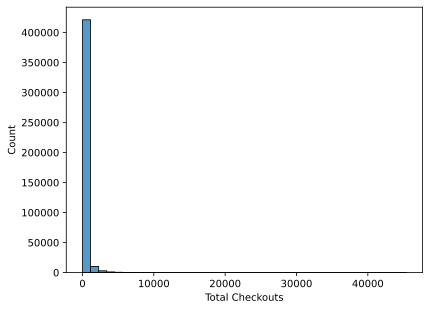

In [54]:
sns.histplot(df['Total Checkouts'], kde=False, bins=40);

#### 3.7 Exkurs: **Ausreißerentfernung III**

In [61]:
df['Total Checkouts Sqrt'] = df['Total Checkouts'] ** (0.5)
df['Total Checkouts log'] = np.log10(df['Total Checkouts'])
df.head(2)

/Users/thomas/Coding/data-librarian/2023-2024_Data_Librarian_Thomas_Schmidt/Modul_3/venv-data-stats-ml/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County,Total Checkouts Sqrt,Total Checkouts log
0,5,Staff,53,15,NaN,b2,Bayview,Mar,2023.0,z,Email,True,2003,False,7.280110,1.724276
1,5,Staff,480,378,NaN,e9,Excelsior,Jun,2023.0,z,Email,True,2003,False,21.908902,2.681241


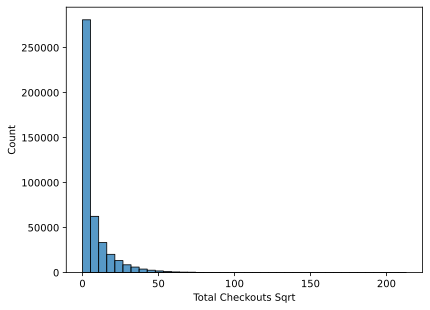

In [59]:
sns.histplot(df['Total Checkouts Sqrt'], kde=False, bins=40);

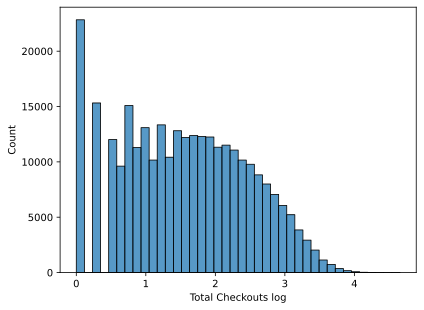

In [62]:
sns.histplot(df['Total Checkouts log'], kde=False, bins=40);

## **Bivariate** Verteilungen
In vielen Fällen ist jedoch der Zusammenhang zwischen zwei Variablen von Interesse. Zwei Variablen, die keinen Zusammenhang aufweisen, nennt man statistisch unabhängige Variablen. Für zwei metrische Variablen kann man außerdem zwischen einem positiven oder einem negativem Zusammenhang unterscheiden.

### **Kreuztabellen**

In [90]:
df = pd.read_csv('data/Library_Usage.csv',
                 low_memory=False,
                 na_values='none')
df.head(2)

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,5,Staff,53,15,NaN,b2,Bayview,Mar,2023.0,z,Email,True,2003,False
1,5,Staff,480,378,NaN,e9,Excelsior,Jun,2023.0,z,Email,True,2003,False


In [8]:
pd.crosstab(
    df['Home Library Definition'],
    df['Age Range'],
    margins=True,
    dropna=False
)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,NaN,All
Home Library Definition,,,,,,,,,,,,
Anza,578,1328,547,1740,1602,1017,387,365,787,455,15,8821.0
Bayview,530,1924,505,991,962,563,257,270,371,126,19,6518.0
Bernal,1121,2367,414,1669,2036,1332,497,376,726,416,22,10976.0
Bookmobile,259,318,95,312,285,183,90,65,133,297,10,2047.0
Chinatown,479,2635,908,2281,1836,1249,504,517,1210,730,27,12376.0
Eureka Valley,577,1401,528,2947,2605,1647,709,591,920,512,12,12449.0
Excelsior,1302,4308,1057,1893,1666,1162,479,454,827,489,19,13656.0
Glen Park,551,1293,348,1071,1512,1214,463,436,821,500,20,8229.0
Golden Gate Valley,347,504,300,2126,1481,615,297,261,522,435,7,6895.0


In [92]:
df['Notice Preference Definition'].value_counts()

Notice Preference Definition
Email    393301
Name: count, dtype: int64

In [95]:
df['Provided Email Address'].value_counts()

Provided Email Address
True     393301
False     42989
Name: count, dtype: int64

In [97]:
pd.crosstab(
    df['Provided Email Address'],
    df['Notice Preference Definition'],
    margins=True,
    dropna=False,
    normalize=0
)

Notice Preference Definition,Email,NaN
Provided Email Address,,
False,0.0,1.0
True,1.0,0.0
All,1.0,0.0


### **Korrelation**
Für zwei *metrische Variablen* lässt sich der Zusammenhang über die sog. **Kovarianz** berechnen. 

Ein positiver Wert der Kovarianz drückt aus, dass wenn die Werte der einen Variablen steigen, dies auch für die andere Variable gilt. Eine negative Kovarianz bedeutet hingegen, dass wenn die Werte der einen Variablen steigen, die Werte der anderen Variablen sinken.

Zusätzlich zur Kovarianz, ist der **Korrelationskoeffizient** eine wichtige Kennzahl. Der Korrelationskoeffizient $ρ_x,_y$ misst für zwei metrische Variablen $x$ und $y$ die Stärke des **linearen Zusammenhangs**. Man sagt auch, dass der Korrelationskoeffizient die standardisierte Kovanrianz darstellt.

In [99]:
df['Total Checkouts'].corr(df['Total Renewals'])

0.6368680323384929

#### 3.8 Exkurs: **Anscombe-Quartett**

In [100]:
df_ascombe = pd.read_csv('data/anscombe.csv')

In [102]:
df_ascombe

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [124]:
df_measures = pd.DataFrame(data={'mean': df_ascombe.mean(),
                                 'median': df_ascombe.median(),
                                 'std': df_ascombe.std()})
df_measures.T

,x1,y1,x2,y2,x3,y3,x4,y4
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
median,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579


In [126]:
df_ascombe.describe()

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


In [136]:
df_ascombe['y1'].sort_values(ascending=True)

7      4.26
9      4.82
10     5.68
1      6.95
6      7.24
2      7.58
0      8.04
4      8.33
3      8.81
5      9.96
8     10.84
Name: y1, dtype: float64

In [149]:
# Berechnung der Korrelation
for i in range(1, 5):
    print(f"x{i}.corr(y{i}): {df_ascombe[f'x{i}'].corr(df_ascombe[f'y{i}']):.4f}")

x1.corr(y1): 0.8164
x2.corr(y2): 0.8162
x3.corr(y3): 0.8163
x4.corr(y4): 0.8165


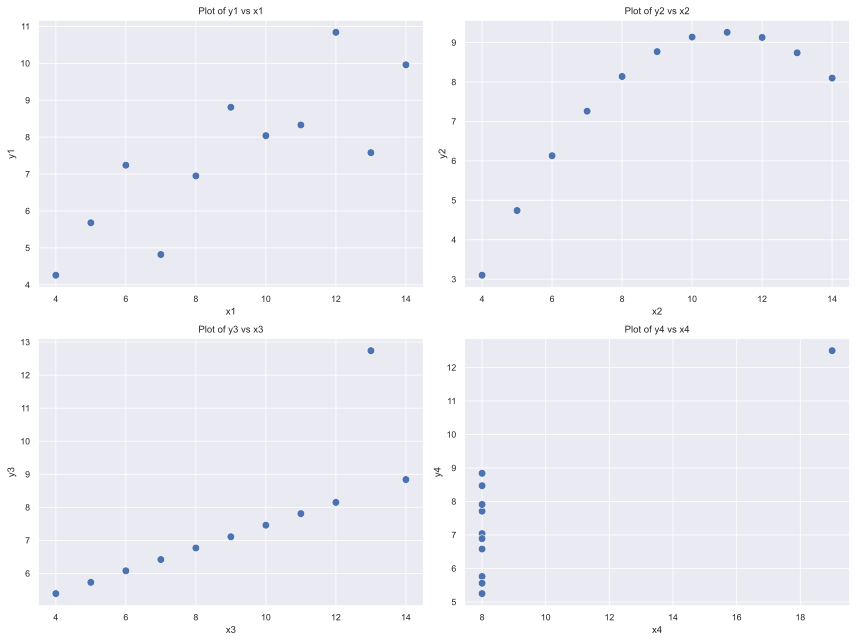

In [186]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9)) # Adjust figsize as needed
axs = axs.flatten() # Flatten the array of axes to easily iterate over it

for i in range(4):
    x_col = f"x{i+1}"
    y_col = f"y{i+1}"
    sns.scatterplot(x=x_col, y=y_col, data=df_ascombe, ax=axs[i], s=60)
    axs[i].set_title(f"Plot of {y_col} vs {x_col}")

plt.tight_layout()
plt.show()

## **Visualisierung** mit Seaborn
→ https://clauswilke.com/dataviz/

In [195]:
# use sample to generate a random subsample
df = pd.read_csv("./data/Library_Usage.csv",
                 low_memory=False).sample(n=1000)

In [197]:
df.head(2)

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
30086,0,Adult,51,77,25 to 34 years,x,Main,Jul,2023.0,z,Email,True,2016,False
250075,1,Juvenile,21,21,0 to 9 years,a5,Anza,Jul,2023.0,z,Email,True,2023,False


In [198]:
df.shape

(1000, 14)

### `relplot()`
Die Funktion [relplot()](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) erzeugt ein **Streudiagram zur Visualisierung einer bivariaten Verteilung** mit metrischen Variablen. Jedes Wertepaar ($x_i,y_i$) der Verteilung wird im Koordinatensystem als Punkt dargestellt. 

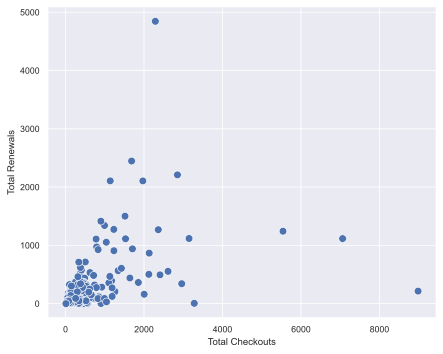

In [211]:
sns.relplot(x='Total Checkouts',
            y='Total Renewals',
            data=df,
            s=60, 
            height=5,
            aspect=1.25);

plt.savefig('tutorial.png', dpi=300)

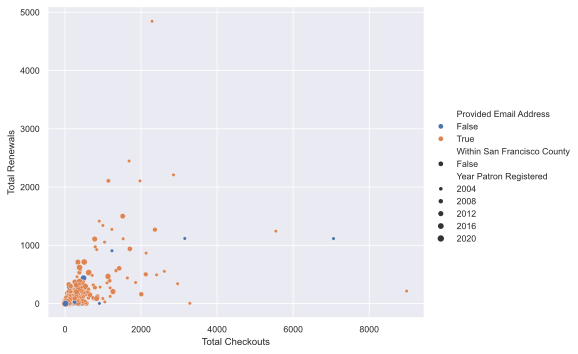

In [220]:
sns.relplot(x='Total Checkouts', 
            y='Total Renewals', 
            hue='Provided Email Address', 
            style='Within San Francisco County', 
            size='Year Patron Registered', 
            data=df,
            aspect=1.25);

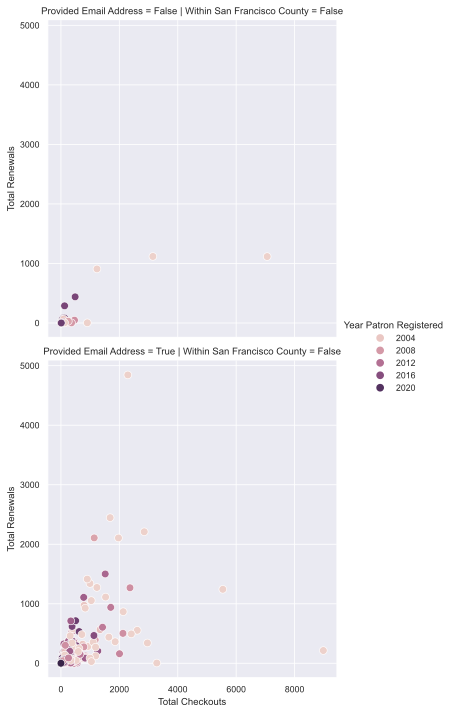

In [225]:
sns.relplot(x='Total Checkouts',
            y='Total Renewals', 
            hue='Year Patron Registered',
            row='Provided Email Address', 
            col='Within San Francisco County',
            s=60,
            data=df);

**color palettes**: https://seaborn.pydata.org/tutorial/color_palettes.html

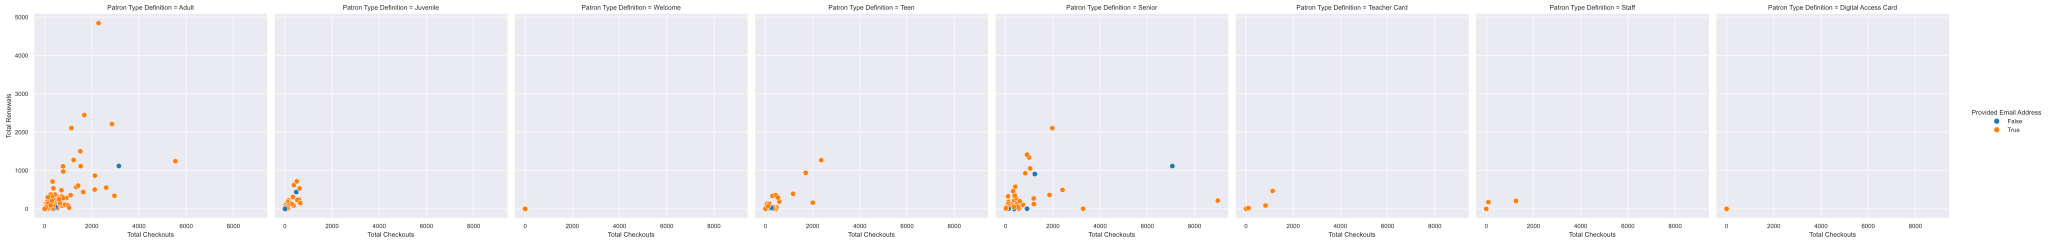

In [236]:
sns.relplot(x='Total Checkouts', 
            y='Total Renewals', 
            hue='Provided Email Address', 
            col='Patron Type Definition',
            palette=sns.color_palette('tab10', 2),
            s=60,
            data=df);

### `catplot()` → [Link](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)

**Nominale und ordinale Variablen**

Univariate Häufigkeits- und Bivariate Kreuztatabellen können mit Balkendiagrammen visualisiert werden:

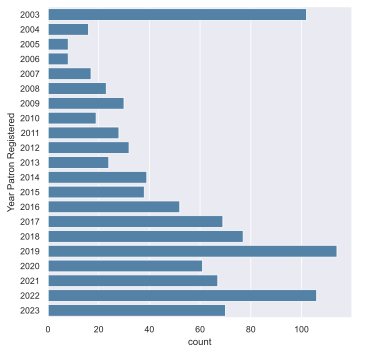

In [242]:
sns.catplot(y='Year Patron Registered',
            data=df, 
            kind='count', 
            color="steelblue");

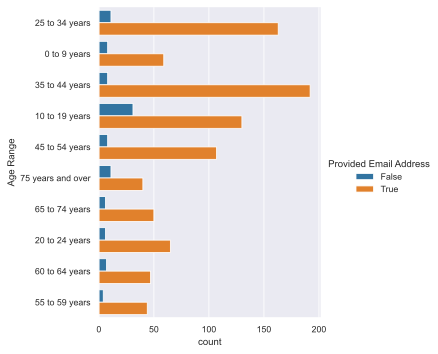

In [251]:
sns.catplot(y='Age Range', 
            hue='Provided Email Address', 
            data=df, 
            kind='count',
            palette=sns.color_palette('tab10', 2))

In [252]:
df['Patron Type Definition'].unique()

array(['Adult', 'Juvenile', 'Welcome', 'Teen', 'Senior', 'Teacher Card',
       'Staff', 'Digital Access Card'], dtype=object)

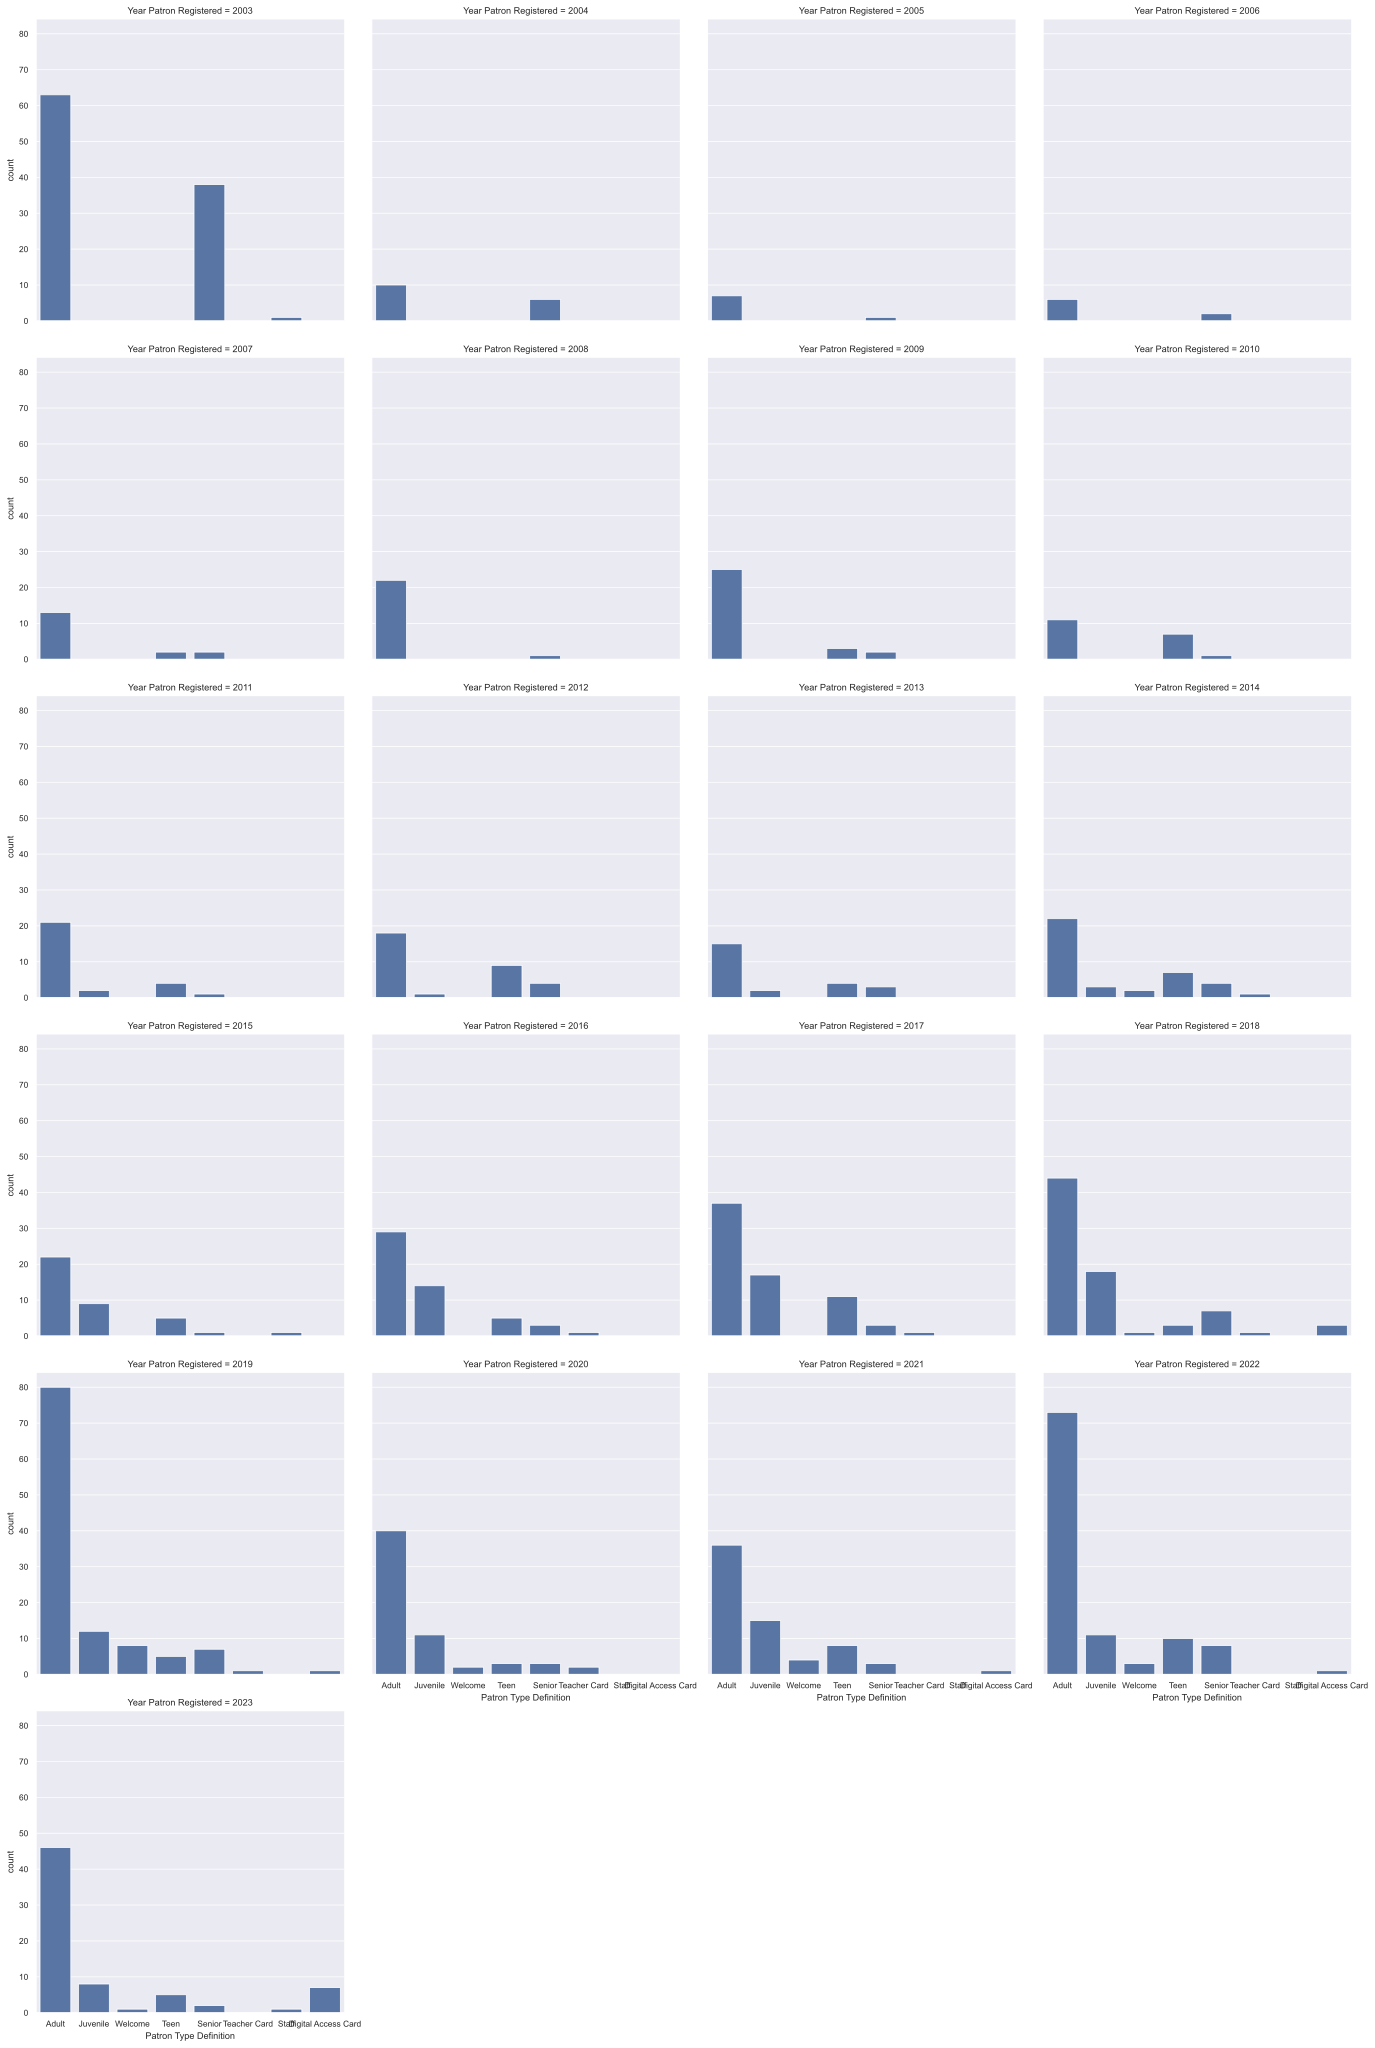

In [253]:
sns.catplot(x='Patron Type Definition', 
            data=df, 
            kind='count', 
            col='Year Patron Registered', 
            col_wrap=4)

**Metrische Variablen**

Univariate Verteilungen werden mit Histogrammen oder Kernel-Dichte Schätzern visualisiert:

/var/folders/23/1xsw6wnj7zx686gppgdjd7900000gn/T/ipykernel_32711/224025452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Renewals'], kde=False)


<Axes: xlabel='Total Renewals'>

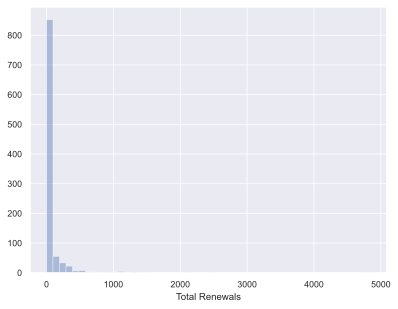

In [260]:
# Histogram
sns.distplot(df['Total Renewals'], kde=False)

/var/folders/23/1xsw6wnj7zx686gppgdjd7900000gn/T/ipykernel_32711/4155080599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Renewals'], kde=True)


<Axes: xlabel='Total Renewals', ylabel='Density'>

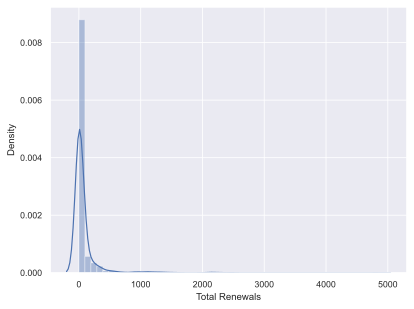

In [299]:
sns.distplot(df['Total Renewals'], kde=True)

/Users/thomas/Coding/data-librarian/2023-2024_Data_Librarian_Thomas_Schmidt/Modul_3/venv-data-stats-ml/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/thomas/Coding/data-librarian/2023-2024_Data_Librarian_Thomas_Schmidt/Modul_3/venv-data-stats-ml/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 31.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/thomas/Coding/data-librarian/2023-2024_Data_Librarian_Thomas_Schmidt/Modul_3/venv-data-stats-ml/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/thomas/Coding/data-librarian/2023-2024_Data_Librarian_T

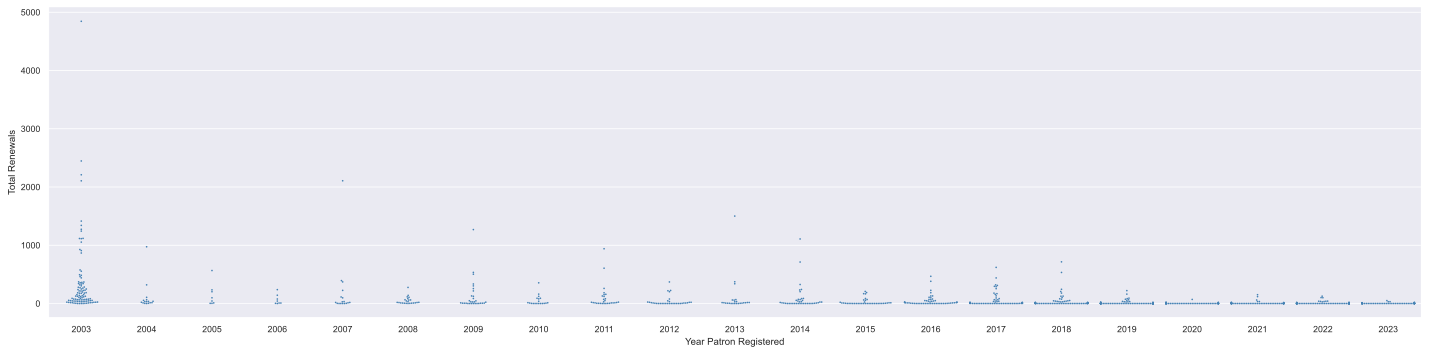

In [264]:
# Swarmplot
sns.catplot(x='Year Patron Registered', 
            y = 'Total Renewals',
            data=df, 
            kind='swarm', 
            color="steelblue",
            s=3, 
            aspect=4)

In [277]:
df_filter = df[df['Year Patron Registered'] > 2003]

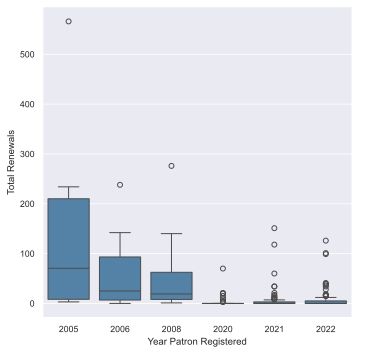

In [284]:
# Boxplot
sns.catplot(x='Year Patron Registered', 
            y = 'Total Renewals',
            data=df[df['Year Patron Registered'].isin([2005, 2006, 2008, 2020, 2021, 2022])], 
            kind='box',
            color="steelblue");
            #col_wrap=6);

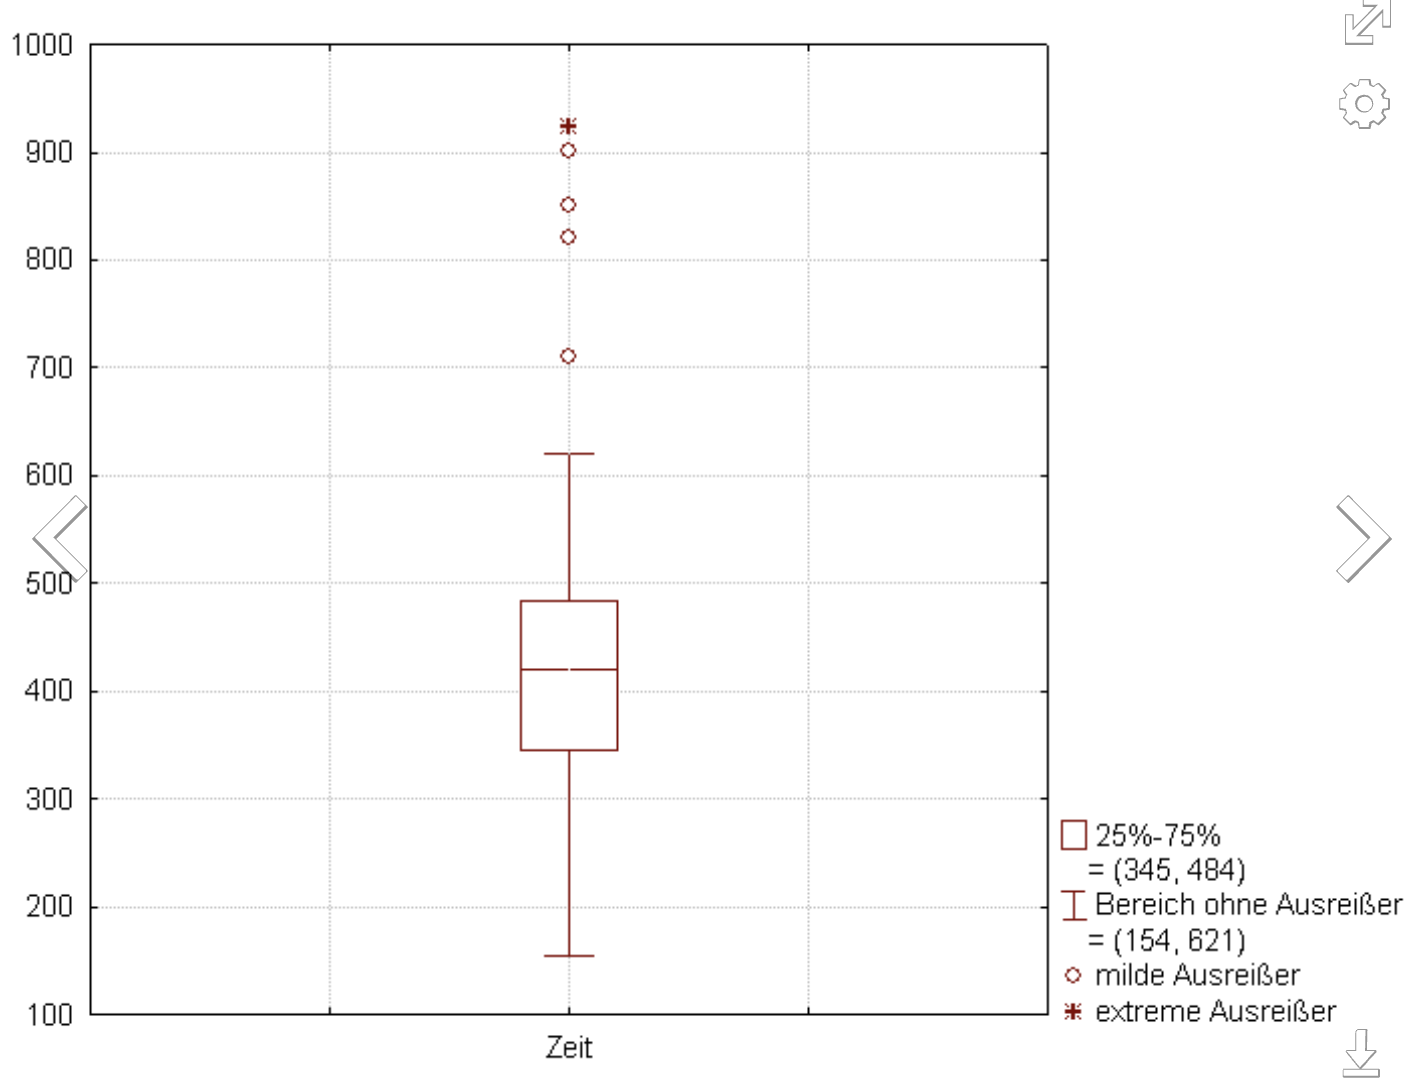

### **Quiz**

In [291]:
under10_mail = df[(df['Age Range'] == '0 to 9 years') & (df['Provided Email Address'] == True)].shape[0]

under10_mail / len(df) * 100

5.8999999999999995

In [292]:
df['Total Checkouts'].quantile(q=0.6)

21.0

In [293]:
df['Age Range'].mode()

0    35 to 44 years
Name: Age Range, dtype: object

In [294]:
df['Total Renewals'].quantile(q=0.75) - df['Total Renewals'].quantile(q=0.25)

34.0

In [300]:
df['Total Renewals'].quantile([0.25, 0.75]).diff()

0.25     NaN
0.75    34.0
Name: Total Renewals, dtype: float64